# Prabal Ghosh Roll-AM.SC.P2CSC20040 Assignment-8 (Machine learning)-GMM_iris

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [27]:
iris=pd.read_csv('D:\\semester 3 videos\\Machine Learning\\notes\\Lab\\Lab8_25_10\\iris.csv')
iris.tail()

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
iris["species"].describe()


count                150
unique                 3
top       Iris-virginica
freq                  50
Name: species, dtype: object

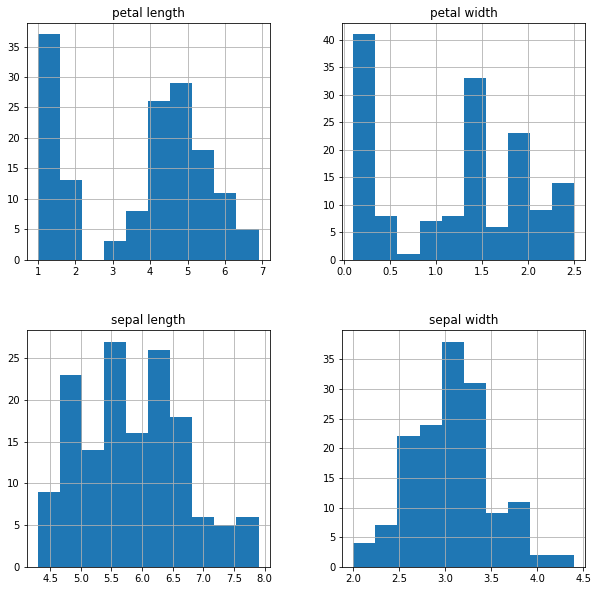

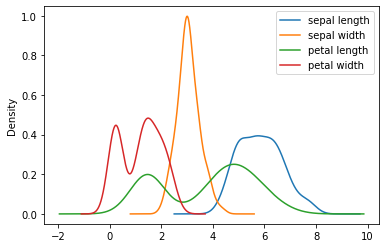

In [29]:
iris1=iris.iloc[:,0:4]
y=iris.iloc[:,-1]
iris1.hist(figsize=(10,10))

iris1.plot(kind="kde")



In [30]:
iris1.tail()

,sepal length,sepal width,petal length,petal width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [31]:
y.tail()

145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, dtype: object

In [32]:
iris.loc[(iris['species']=='Iris-setosa'),'sepal length'].tail()

45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length, dtype: float64

Text(0, 0.5, 'Probability Density')

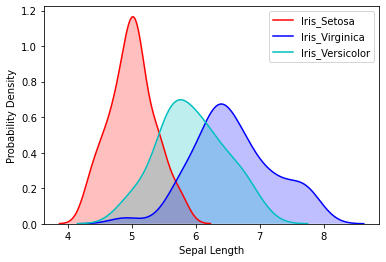

In [33]:
sns.kdeplot(iris.loc[(iris['species']=='Iris-setosa'),
            'sepal length'], color='r', shade=True, Label='Iris_Setosa')
  
sns.kdeplot(iris.loc[(iris['species']=='Iris-virginica'), 
            'sepal length'], color='b', shade=True, Label='Iris_Virginica')

sns.kdeplot(iris.loc[(iris['species']=='Iris-versicolor'), 
            'sepal length'], color='c', shade=True, Label='Iris_Versicolor')
  
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')

In [34]:
iris.iloc[:,0].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length, dtype: float64

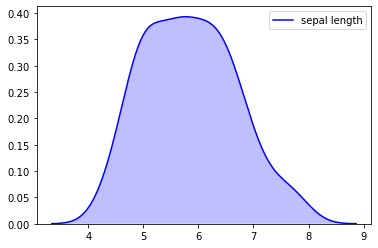

In [35]:
sns.kdeplot(iris.iloc[:,0], color='b', shade=True)
  

C:\Users\Prabal Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


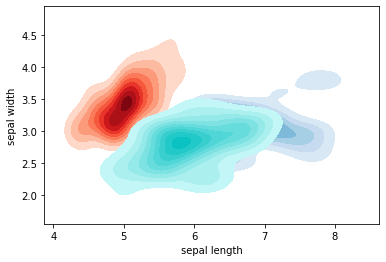

In [36]:
iris_setosa = iris.query("species=='Iris-setosa'")
iris_virginica = iris.query("species=='Iris-virginica'")
iris_versicolor = iris.query("species=='Iris-versicolor'")

  
# Plotting the KDE Plot
sns.kdeplot(iris_setosa['sepal length'], 
            iris_setosa['sepal width'],
            color='r', shade=True, Label='Iris_Setosa',
            cmap="Reds", shade_lowest=False)

sns.kdeplot(iris_virginica['sepal length'], 
            iris_virginica['sepal width'],
            color='b', shade=True, Label='Iris_Virginica',
            cmap="Blues", shade_lowest=False)

sns.kdeplot(iris_versicolor['sepal length'], 
            iris_versicolor['sepal width'],
            color='c', shade=True, Label='Iris_Versicolor',
             shade_lowest=False)


In [37]:
from scipy.stats import shapiro
for i in iris1.columns:
    print(f'{i}: {"Not Gaussian" if shapiro(iris1[i])[1]<0.05 else "Gaussian"}  {shapiro(iris1[i])}')

sepal length: Not Gaussian  ShapiroResult(statistic=0.9760899543762207, pvalue=0.010180278681218624)
sepal width: Gaussian  ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)
petal length: Not Gaussian  ShapiroResult(statistic=0.8764243125915527, pvalue=7.54509399403247e-10)
petal width: Not Gaussian  ShapiroResult(statistic=0.902624249458313, pvalue=1.864667886763982e-08)


# KMeans clustering

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris1)

KMeans(n_clusters=3)

In [39]:
pred = kmeans.predict(iris1)
data = pd.DataFrame(iris1)
data['cluster'] = pred
data.columns = ['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width','cluster']

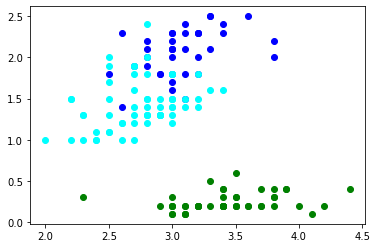

In [40]:
color=['blue','green','cyan']

#fig = plt.figure(figsize = (16, 9))
for k in range(0,3):
    d = data[data["cluster"]==k]
    #ax = plt.axes(projection ="3d")
    #my_cmap = plt.get_cmap('hsv')
    plt.scatter(d["Sepal_width"],d["Petal_width"],c=color[k])
    
plt.show()

Text(0.5, 1.0, 'different clusters)')

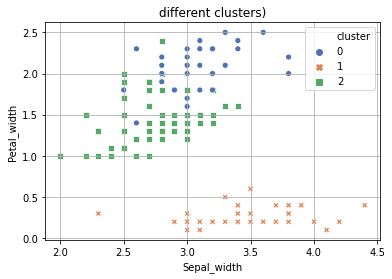

In [52]:
# draw the same plot using seaborn
sns.scatterplot(data=iris1, x="Sepal_width", y="Petal_width",hue="cluster",style="cluster",palette="deep")
plt.grid(True)
plt.title('different clusters)')

In [42]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y, pred)
print(score)



0.7302382722834697


# GaussianMixtureclustering 

In [43]:
import pandas as pd
iris3=pd.read_csv('D:\\semester 3 videos\\Machine Learning\\notes\\Lab\\Lab8_25_10\\iris.csv')
iris2=iris3.iloc[:,0:4]
y1=iris3.iloc[:,-1]

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type='full',random_state=42)
gmm.fit(iris2)

GaussianMixture(n_components=3, random_state=42)

In [44]:
print(iris2.shape)
cluster1 = gmm.predict(iris2)
c=gmm.predict_proba(iris2)
print(c)


(150, 4)
[[6.14801384e-035 1.00000000e+000 1.02611131e-043]
 [2.34417311e-028 1.00000000e+000 8.73156713e-031]
 [4.13839264e-030 1.00000000e+000 1.05971018e-035]
 [2.59053219e-026 1.00000000e+000 1.58901779e-031]
 [2.71282921e-035 1.00000000e+000 4.03725313e-046]
 [3.19896003e-035 1.00000000e+000 9.47551645e-045]
 [6.10196256e-029 1.00000000e+000 9.62354242e-036]
 [5.87734866e-032 1.00000000e+000 6.48099224e-040]
 [2.64588679e-024 1.00000000e+000 2.33396902e-027]
 [7.34400540e-029 1.00000000e+000 1.77676378e-035]
 [5.75423962e-038 1.00000000e+000 4.13614175e-049]
 [2.95927918e-029 1.00000000e+000 2.11761175e-038]
 [1.67701240e-028 1.00000000e+000 1.10232550e-033]
 [7.75600786e-028 1.00000000e+000 5.58614951e-034]
 [3.74465354e-048 1.00000000e+000 5.14749199e-062]
 [1.24462984e-046 1.00000000e+000 2.75497344e-063]
 [2.79986278e-040 1.00000000e+000 4.30597323e-049]
 [7.50941875e-034 1.00000000e+000 3.94190831e-040]
 [4.10363095e-037 1.00000000e+000 1.87107086e-046]
 [6.65607906e-036 1.00

In [45]:
data1 = pd.DataFrame(iris2)
data1['cluster'] = cluster1
data1.columns = ['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width','cluster']
pd.set_option('display.max_rows', None)
print(data1)

     Sepal_length  Sepal_width  Petal_length  Petal_width  cluster
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
5             5.4          3.9           1.7          0.4        1
6             4.6          3.4           1.4          0.3        1
7             5.0          3.4           1.5          0.2        1
8             4.4          2.9           1.4          0.2        1
9             4.9          3.1           1.5          0.1        1
10            5.4          3.7           1.5          0.2        1
11            4.8          3.4           1.6          0.2        1
12            4.8          3.0           1.4          0.1        1
13            4.3          3.0           1.1          0.1     

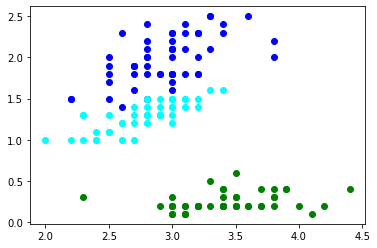

In [46]:
color=['blue','green','cyan']
for k in range(0,3):
    d1 = data1[data1["cluster"]==k]
    plt.scatter(d1["Sepal_width"],d1["Petal_width"],c=color[k])
plt.show()

Text(0.5, 1.0, 'different clusters)')

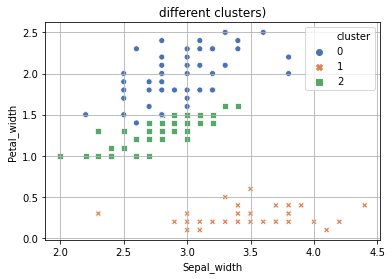

In [47]:
# draw the same plot using seaborn
sns.scatterplot(data=iris2, x="Sepal_width", y="Petal_width",hue="cluster",style="cluster",palette="deep")
plt.grid(True)
plt.title('different clusters)')

In [48]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, cluster1)
print(score)

0.9038742317748124


In [49]:
d1.iloc[:,0].describe()

count    45.000000
mean      5.904444
std       0.526979
min       4.900000
25%       5.600000
50%       5.800000
75%       6.300000
max       7.000000
Name: Sepal_length, dtype: float64

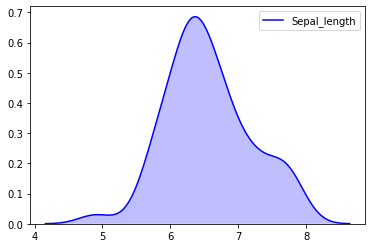

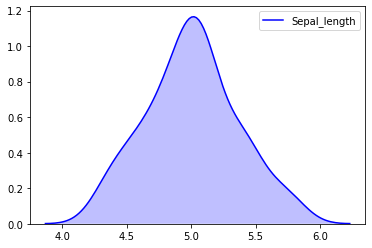

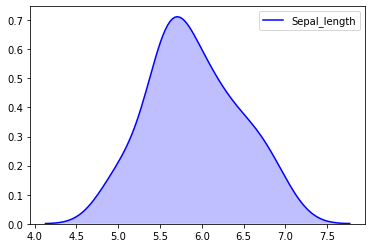

In [50]:
# kde plot for Sepal_length feature for differnet clusters
color=['blue','green','cyan']
for k in range(0,3):
    d1 = data1[data1["cluster"]==k]
    sns.kdeplot(d1.iloc[:,0], color='b', shade=True)
    plt.show()